In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm 
from matplotlib import axes
import seaborn as sns

## 读取csv格式的数据

In [2]:
mnist_en = pd.read_csv('MNIST-eN.csv')
mnist_en

,w,b,DBN,DBNSigma,DBNdelta,QR,QRSigma,QRdelta,lr
0,128,1024,94.36,94.65,0.29,95.47,95.65,0.18,0.1
1,128,2048,93.49,93.60,0.11,94.20,94.33,0.13,0.1
2,128,3072,93.01,93.07,0.06,93.92,93.96,0.04,0.1
3,128,4096,92.70,92.68,-0.02,93.55,93.58,0.03,0.1
4,128,full,86.01,86.04,0.03,87.93,87.91,-0.02,0.1
...,...,...,...,...,...,...,...,...,...
75,512,1024,84.00,90.52,6.52,92.12,95.01,2.89,2.0
76,512,2048,88.46,89.88,1.42,93.58,94.42,0.84,2.0
77,512,3072,89.13,89.77,0.64,92.58,93.03,0.45,2.0
78,512,4096,87.97,88.38,0.41,91.69,92.00,0.31,2.0


In [130]:
def generate_data(dataFrame, xlabel='batch size', ylabel='wide', lr=0.5, target='DBNdelta'):
    data = dataFrame.rename(columns={'w':ylabel,'b':xlabel})
    data = data[data['lr']==lr].pivot(ylabel, xlabel, target)
    data = data.reindex(data.sort_values(by=ylabel, ascending=False).index)  
    return data

def draw_heatmap(data,title='DBN 0.5'):
    f, ax = plt.subplots()
    ax.set_title(title)
    sns.heatmap(data, annot=True, ax=ax)
    f.savefig(title + '.pdf')
    
def draw_delta(dataFrame, lr=0.5, xlabel='batch size', ylabel='wide', target='DBNdelta', title=None):
    data= generate_data(dataFrame, xlabel=xlabel, ylabel=ylabel, lr=lr, target=target)
    if title is None:
        title
    draw_heatmap(data, title='lr'+str(lr)+'_'+target)  

## 绘制热图

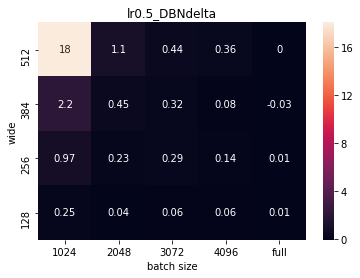

In [131]:
draw_delta(mnist_en, lr=0.5, target='DBNdelta')

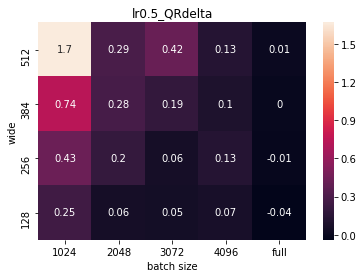

In [132]:
draw_delta(mnist_en, lr=0.5, target='QRdelta')

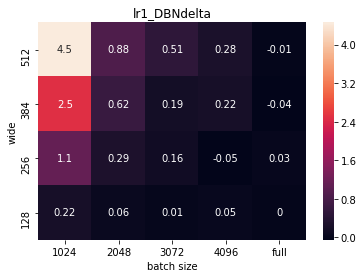

In [133]:
draw_delta(mnist_en, lr=1, target='DBNdelta')

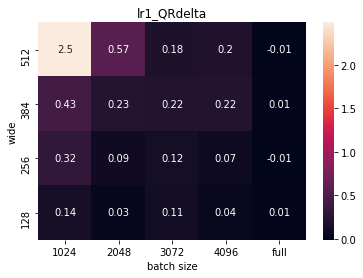

In [134]:
draw_delta(mnist_en, lr=1, target='QRdelta')